In [2]:
import pandas as pd
df =  pd.read_csv(r"C:\Users\Md Mojammil\Downloads\Simulator_readings.csv")

In [3]:
df.head()

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Time(ms)   2400 non-null   int64
 1   Fhr1(BPM)  2400 non-null   int64
 2   Fhr2(BPM)  2400 non-null   int64
 3   Uc(TOCO)   2400 non-null   int64
dtypes: int64(4)
memory usage: 75.1 KB


In [6]:
df.isna().sum()

Time(ms)     0
Fhr1(BPM)    0
Fhr2(BPM)    0
Uc(TOCO)     0
dtype: int64

In [10]:
df.describe()

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
count,2400.000000,2400.000000,2400.0,2400.000000
mean,300125.000000,135.424167,0.0,28.877500
std,173241.161391,11.929454,0.0,21.197438
min,250.000000,123.000000,0.0,9.000000
25%,150187.500000,127.000000,0.0,11.000000
50%,300125.000000,128.000000,0.0,18.000000
75%,450062.500000,144.000000,0.0,46.000000
max,600000.000000,164.000000,0.0,84.000000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time(ms)' from milliseconds to seconds for easier plotting
df['Time(s)'] = df['Time(ms)'] / 1000

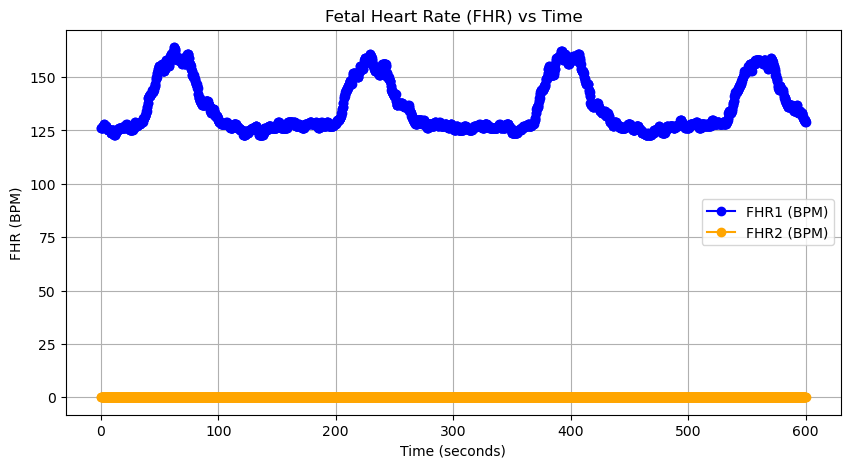

In [12]:
# Plotting FHR (Fhr1 and Fhr2) vs Time
plt.figure(figsize=(10, 5))

# FHR1
plt.plot(df['Time(s)'], df['Fhr1(BPM)'], label='FHR1 (BPM)', color='blue', marker='o')
# FHR2
plt.plot(df['Time(s)'], df['Fhr2(BPM)'], label='FHR2 (BPM)', color='orange', marker='o')

plt.title('Fetal Heart Rate (FHR) vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('FHR (BPM)')
plt.legend()
plt.grid(True)
plt.show()


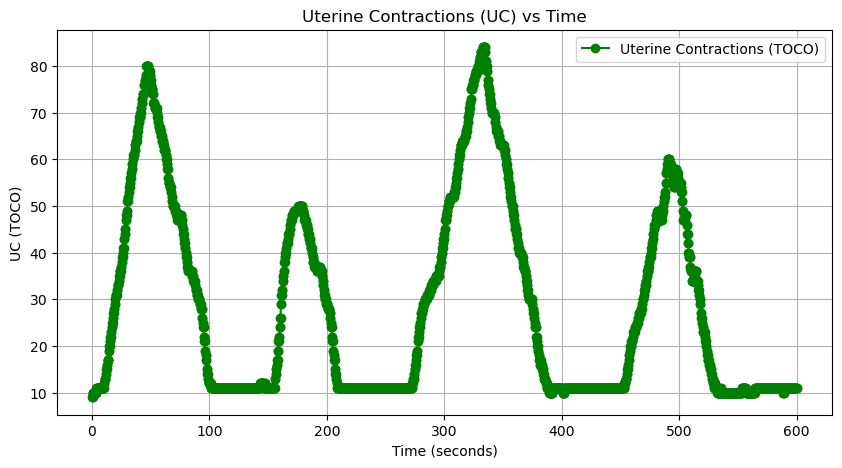

In [13]:
# Plotting UC (TOCO) vs Time
plt.figure(figsize=(10, 5))
plt.plot(df['Time(s)'], df['Uc(TOCO)'], label='Uterine Contractions (TOCO)', color='green', marker='o')

plt.title('Uterine Contractions (UC) vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('UC (TOCO)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Define the epoch duration in seconds
epoch_duration = 3.75  # seconds


In [16]:
import numpy as np

# Calculate the epoch number for each data point
df['Epoch'] = np.floor(df['Time(s)'] / epoch_duration)



In [17]:
# Group data by epochs
epoch_groups = df.groupby('Epoch')



In [18]:

# Initialize lists to store results
epoch_numbers = []
average_fhr1_bpm = []
average_fhr2_bpm = []
average_pulse_interval1_ms = []
average_pulse_interval2_ms = []



In [19]:
# Loop through each epoch group
for epoch, group in epoch_groups:
    # Calculate the average FHR (BPM) for both Fhr1 and Fhr2 in the epoch
    avg_fhr1_bpm = group['Fhr1(BPM)'].mean()
    avg_fhr2_bpm = group['Fhr2(BPM)'].mean()
    
    # Convert average FHR to Pulse Interval (milliseconds)
    avg_pulse_interval1_ms = 60000 / avg_fhr1_bpm if avg_fhr1_bpm != 0 else np.nan
    avg_pulse_interval2_ms = 60000 / avg_fhr2_bpm if avg_fhr2_bpm != 0 else np.nan
    
    # Append results to the lists
    epoch_numbers.append(epoch)
    average_fhr1_bpm.append(avg_fhr1_bpm)
    average_fhr2_bpm.append(avg_fhr2_bpm)
    average_pulse_interval1_ms.append(avg_pulse_interval1_ms)
    average_pulse_interval2_ms.append(avg_pulse_interval2_ms)



In [21]:
# Create a DataFrame for the results
epoch_df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Avg_FHR1_BPM': average_fhr1_bpm,
    'Avg_FHR2_BPM': average_fhr2_bpm,
    'Avg_Pulse_Interval1(ms)': average_pulse_interval1_ms,
    'Avg_Pulse_Interval2(ms)': average_pulse_interval2_ms
})

# Display the results
print(epoch_df.head())

   Epoch  Avg_FHR1_BPM  Avg_FHR2_BPM  Avg_Pulse_Interval1(ms)  \
0    0.0    126.714286           0.0               473.506201   
1    1.0    125.800000           0.0               476.947536   
2    2.0    124.600000           0.0               481.540931   
3    3.0    124.333333           0.0               482.573727   
4    4.0    125.933333           0.0               476.442562   

   Avg_Pulse_Interval2(ms)  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

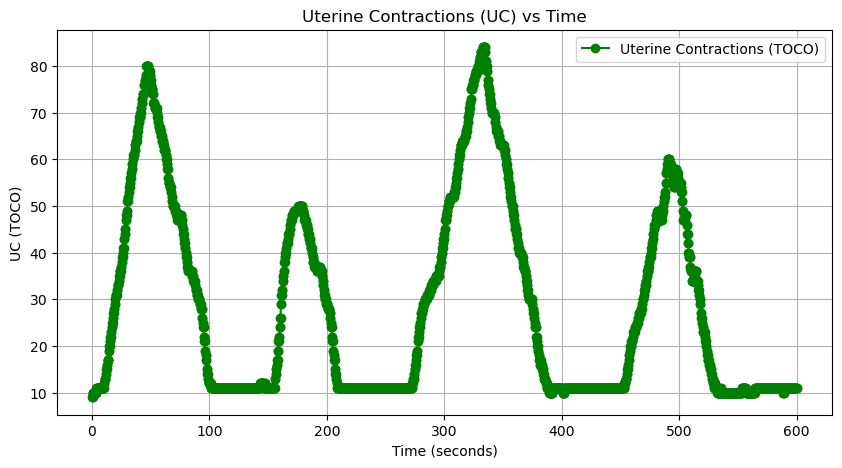

In [23]:
# Plot UC data for visualization
plt.figure(figsize=(10, 5))
plt.plot(df['Time(s)'], df['Uc(TOCO)'], label='Uterine Contractions (TOCO)', color='green', marker='o')
plt.title('Uterine Contractions (UC) vs Time')
plt.xlabel('Time (seconds)')
plt.ylabel('UC (TOCO)')
plt.legend()
plt.grid(True)
plt.show()



In [25]:
# Peak detection using SciPy
uc_values = df['Uc(TOCO)'].values
time_values = df['Time(s)'].values



In [26]:
# Detect peaks
peaks, _ = find_peaks(uc_values, height=0)  # height=0 to detect all positive peaks




In [27]:
# Find peak widths at half the maximum height
results_half = peak_widths(uc_values, peaks, rel_height=0.5)



In [28]:
# Filter peaks by width greater than 30 seconds
peak_widths_sec = results_half[0] * (time_values[1] - time_values[0])  # Convert to time (seconds)
wide_peaks_indices = np.where(peak_widths_sec > 30)[0]



In [29]:
# Calculate average duration of peaks where width > 30 seconds
average_duration = np.mean(peak_widths_sec[wide_peaks_indices]) if len(wide_peaks_indices) > 0 else 0



In [30]:
# Report results
print(f"Number of peaks with width > 30 seconds: {len(wide_peaks_indices)}")
print(f"Average duration of wide peaks: {average_duration:.2f} seconds")


Number of peaks with width > 30 seconds: 4
Average duration of wide peaks: 45.34 seconds


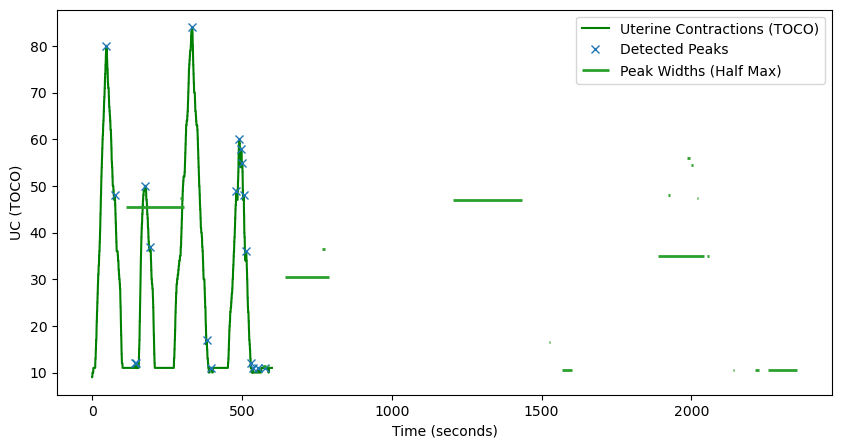

In [31]:

# Plot the peaks
plt.figure(figsize=(10, 5))
plt.plot(df['Time(s)'], df['Uc(TOCO)'], label='Uterine Contractions (TOCO)', color='green')
plt.plot(df['Time(s)'][peaks], uc_values[peaks], "x", label='Detected Peaks')
plt.hlines(*results_half[1:], color="C2", label="Peak Widths (Half Max)", linewidth=2)
plt.xlabel('Time (seconds)')
plt.ylabel('UC (TOCO)')
plt.legend()
plt.show()

# Objective: You are required to create an image segmentation model on any dataset of your
# choice. The goal is to accurately segment different regions within the images using a machine
# learning or deep learning approach.

#### Python Code for MNIST Segmentation with U-Net

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [37]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()




In [39]:
# Preprocess the dataset
X_train = X_train.astype('float32') / 255.0  # Normalize to [0, 1]
X_test = X_test.astype('float32') / 255.0



In [40]:
# Convert digit labels to binary masks (1 for digit, 0 for background)
y_train_binary = np.where(X_train > 0.5, 1, 0)  # Binary mask
y_test_binary = np.where(X_test > 0.5, 1, 0)



In [41]:
# Expand dimensions to make them compatible with U-Net (batch_size, width, height, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
y_train_binary = np.expand_dims(y_train_binary, axis=-1)
y_test_binary = np.expand_dims(y_test_binary, axis=-1)



In [42]:
# Define the U-Net model (similar to the one above)
def unet_model(input_size=(28, 28, 1)):
    inputs = layers.Input(input_size)
    
    # Encoding layers
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Decoding layers
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)  # Output binary mask
    model = models.Model(inputs, outputs)
    
    return model



In [43]:
# Build and compile the model
unet = unet_model()
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [45]:
# Train the model
history = unet.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=1, batch_size=64)



938/938 ━━━━━━━━━━━━━━━━━━━━ 6502s 7s/step - accuracy: 0.9940 - loss: 0.0145 - val_accuracy: 0.9987 - val_loss: 0.0030


In [46]:
# Evaluate the model
results = unet.evaluate(X_test, y_test_binary)

313/313 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.9987 - loss: 0.0030


In [47]:
# Predict segmentation masks
preds = unet.predict(X_test[:3])



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


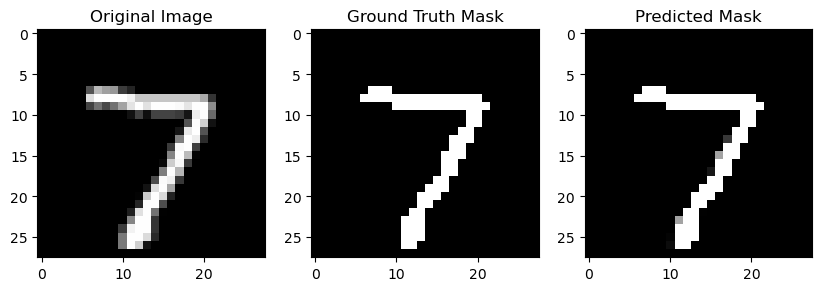

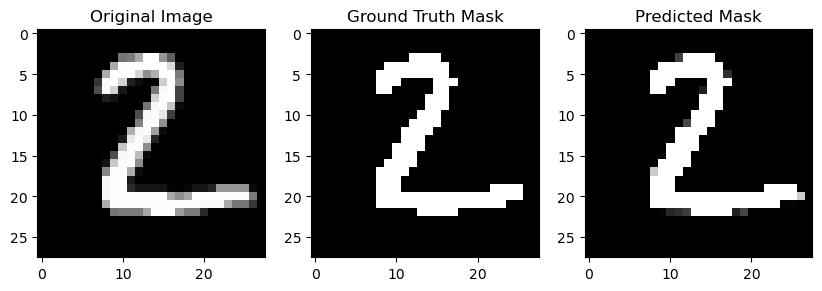

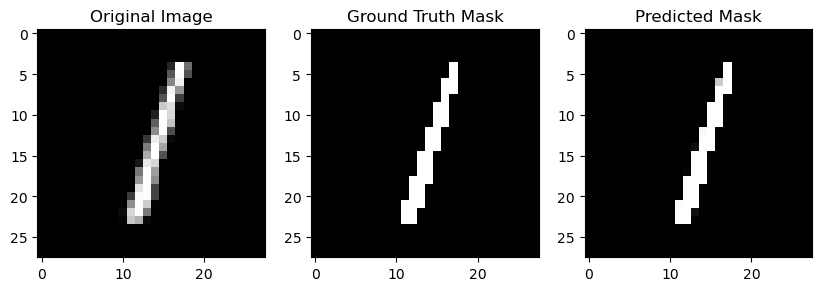

In [48]:
# Visualize predictions
for i in range(3):
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Original Image")

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(y_test_binary[i].squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(preds[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")

    plt.show()

In [ ]:
# Evaluation

In [49]:
from sklearn.metrics import jaccard_score

# Function to calculate IoU
def calculate_iou(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = np.round(y_pred.flatten())  # Threshold prediction to binary
    return jaccard_score(y_true_flat, y_pred_flat)

# Calculate IoU for the predictions
iou_scores = [calculate_iou(y_test_binary[i], preds[i]) for i in range(len(preds))]
average_iou = np.mean(iou_scores)
print(f"Average IoU: {average_iou:.4f}")


Average IoU: 0.9896
